# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [ ]:
# Install the required libraries
!pip install prophet

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [8]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_22944/1669825240.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [3]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_22944/4250804472.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


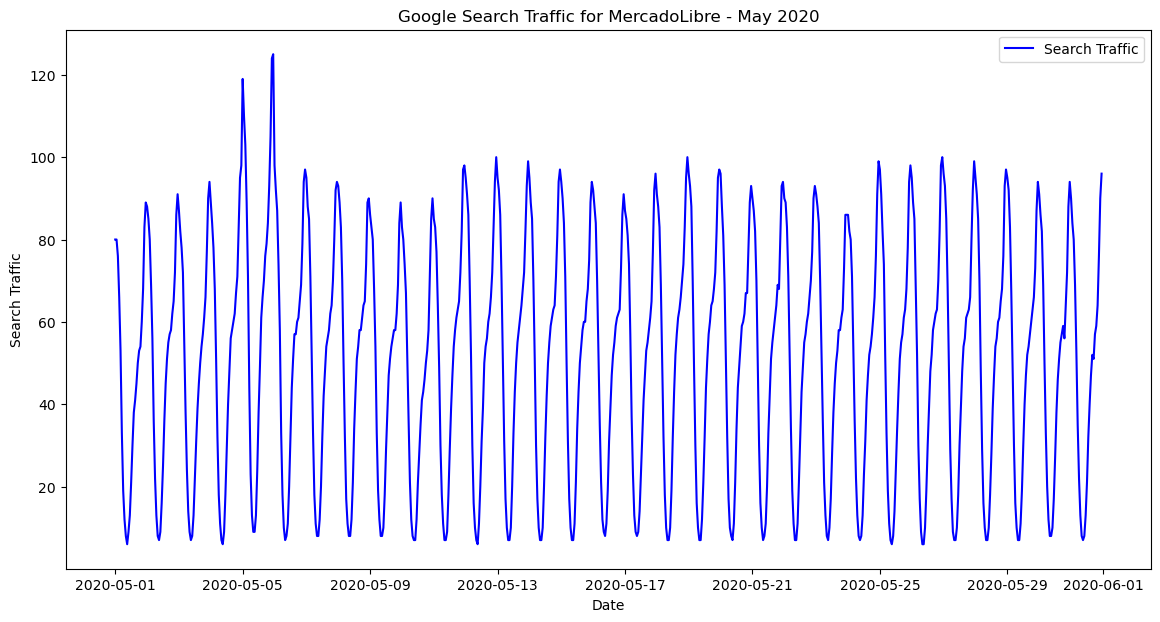

In [15]:
# Install the required libraries
!pip install prophet

# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

# Slice the DataFrame to just the month of May 2020
may_2020_data = df_mercado_trends.loc['2020-05']

# Plot to visualize the data for May 2020
plt.figure(figsize=(14, 7))
plt.plot(may_2020_data.index, may_2020_data['Search Trends'], label='Search Traffic', color='blue')
plt.title('Google Search Traffic for MercadoLibre - May 2020')
plt.xlabel('Date')
plt.ylabel('Search Traffic')
plt.legend()
plt.show()


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [13]:
# Calculate the sum of the total search traffic for May 2020
total_traffic_may_2020 = may_2020_data['Search Trends'].sum()

# View the total_traffic_may_2020 value
print(f"Total search traffic for May 2020: {total_traffic_may_2020}")

# Calculate the monthly total search traffic across all months
monthly_traffic = df_mercado_trends['Search Trends'].resample('M').sum()

# Calculate the median of the monthly total search traffic
monthly_median_traffic = monthly_traffic.median()

# View the monthly_median_traffic value
print(f"Monthly median search traffic: {monthly_median_traffic}")

# Check if the search traffic in May 2020 increased compared to the median
traffic_increased = total_traffic_may_2020 > monthly_median_traffic
print(f"Did the search traffic increase in May 2020? {'Yes' if traffic_increased else 'No'}")



Total search traffic for May 2020: 38181
Monthly median search traffic: 35172.5
Did the search traffic increase in May 2020? Yes


In [6]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
# Import the required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Slice the DataFrame to just the month of May 2020
may_2020_data = df_mercado_trends.loc['2020-05']



# Calculate the total search traffic for May 2020
total_traffic_may_2020 = may_2020_data['Search Trends'].sum()

# View the total_traffic_may_2020 value
print(f"Total search traffic for May 2020: {total_traffic_may_2020}")

# Calculate the monthly total search traffic across all months
monthly_traffic = df_mercado_trends['Search Trends'].resample('M').sum()

# Calculate the median of the monthly total search traffic
median_monthly_traffic = monthly_traffic.median()

# View the median_monthly_traffic value
print(f"Monthly median search traffic: {median_monthly_traffic}")

# Compare the search traffic for May 2020 to the monthly median
traffic_increased = total_traffic_may_2020 > median_monthly_traffic
print(f"Did the search traffic increase in May 2020? {'Yes' if traffic_increased else 'No'}")


/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/3717647123.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


Total search traffic for May 2020: 38181
Monthly median search traffic: 35172.5
Did the search traffic increase in May 2020? Yes


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** - YES, 38K searches versus median value of 35K

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/230743358.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


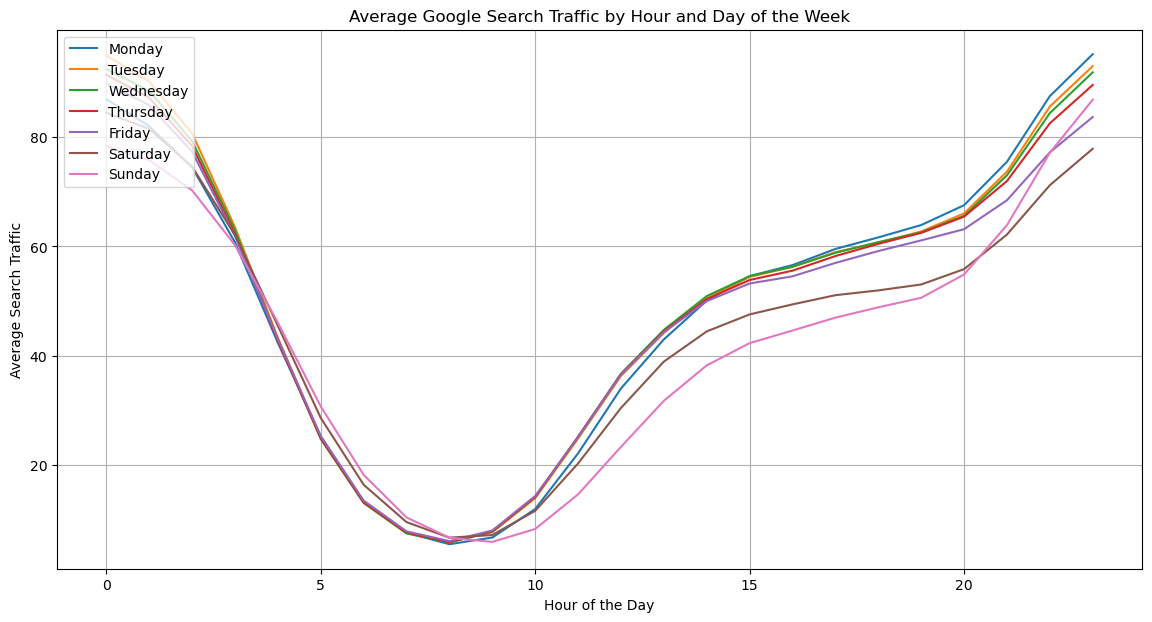

In [12]:

# Set the "Date" column as the Datetime Index
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Group the hourly search data to plot the average traffic by the day of week, using df.index.hour
df_mercado_trends['Hour'] = df_mercado_trends.index.hour
df_mercado_trends['DayOfWeek'] = df_mercado_trends.index.dayofweek

# Group by day of the week and hour to calculate average traffic
hourly_traffic_by_day = df_mercado_trends.groupby(['DayOfWeek', 'Hour'])['Search Trends'].mean().unstack(level=0)

# Plot the average traffic by the day of the week
plt.figure(figsize=(14, 7))
for day in range(7):
    plt.plot(hourly_traffic_by_day.index, hourly_traffic_by_day[day], label=f'Day {day}')

plt.title('Average Google Search Traffic by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Search Traffic')
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], loc='upper left')
plt.grid(True)
plt.show()




#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/1388838446.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


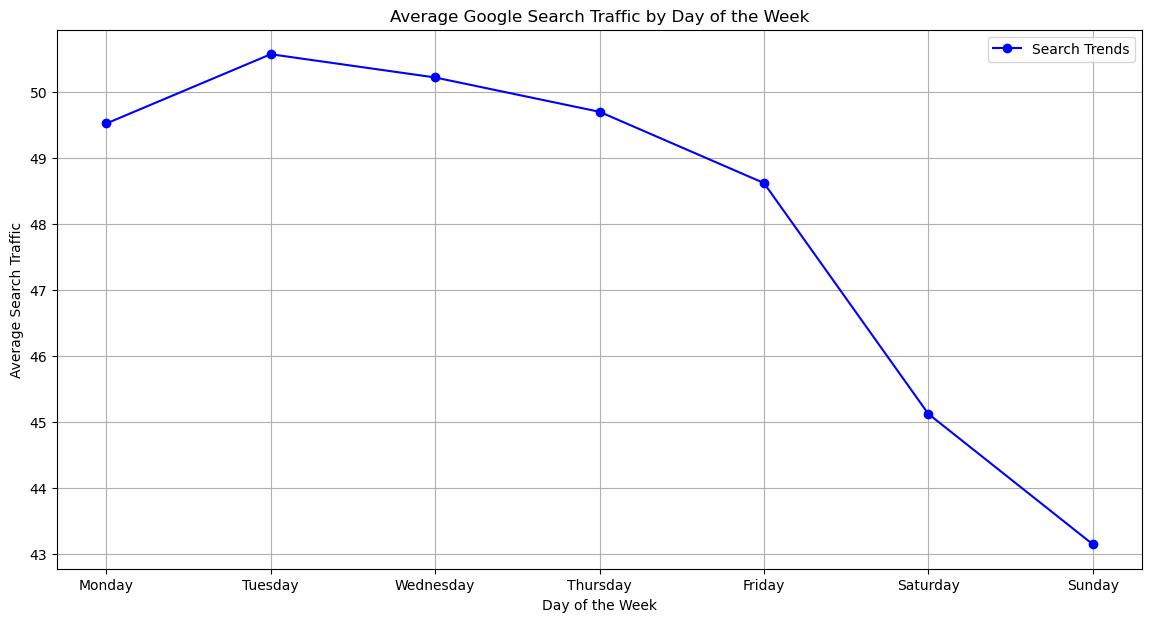

In [10]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Group the hourly search data to plot the average traffic by the day of the week
df_mercado_trends['DayOfWeek'] = df_mercado_trends.index.dayofweek
daily_traffic = df_mercado_trends.groupby('DayOfWeek')['Search Trends'].mean()

# Plot the average traffic by the day of the week
plt.figure(figsize=(14, 7))
plt.plot(daily_traffic.index, daily_traffic, marker='o', linestyle='-', color='blue', label='Search Trends')
plt.title('Average Google Search Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Search Traffic')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend()
plt.grid(True)
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/2495718550.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


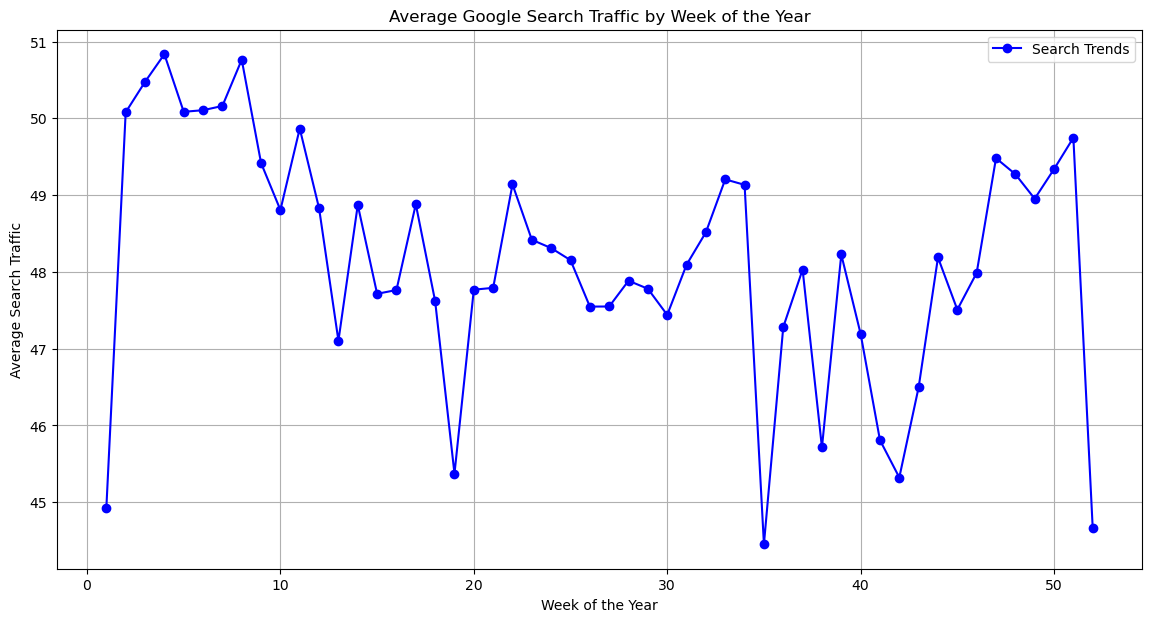

In [13]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Group the hourly search data to plot the average traffic by the week of the year
df_mercado_trends['WeekOfYear'] = df_mercado_trends.index.isocalendar().week
weekly_traffic = df_mercado_trends.groupby('WeekOfYear')['Search Trends'].mean()

# Plot the average traffic by the week of the year
plt.figure(figsize=(14, 7))
plt.plot(weekly_traffic.index, weekly_traffic, marker='o', linestyle='-', color='blue', label='Search Trends')
plt.title('Average Google Search Traffic by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Search Traffic')
plt.legend()
plt.grid(True)
plt.show()


##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**  Yes, the searches are occuring during the work week, usually earlier in the day, and likely ramp up before earnings announcements and wind down after.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [14]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


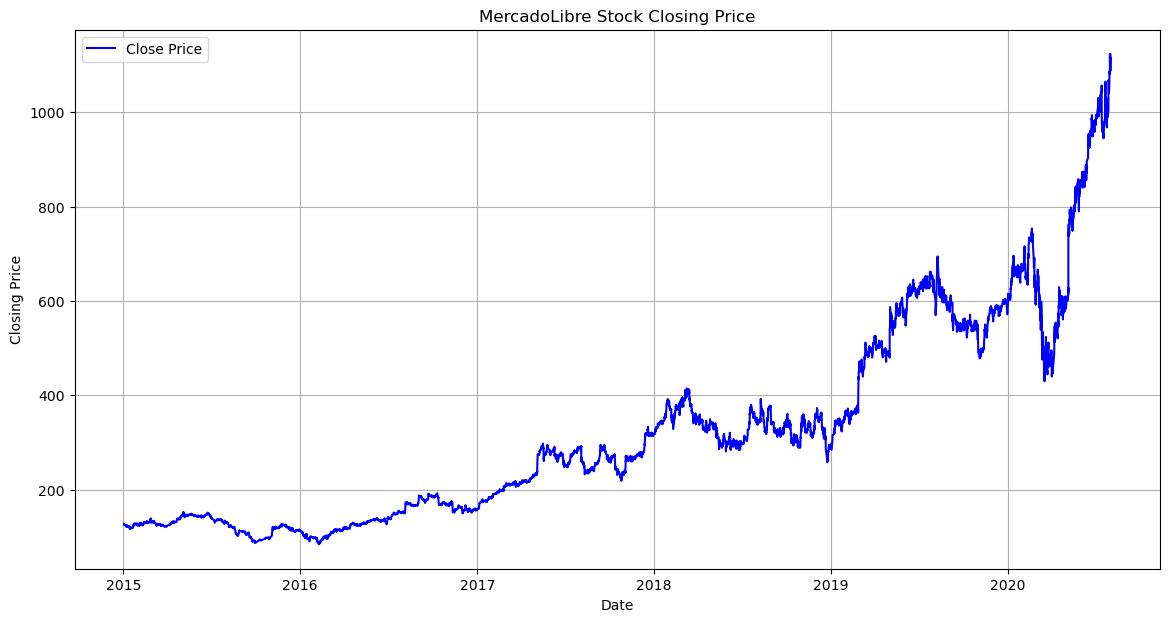

In [16]:
# Visualize the closing price of the df_mercado_stock DataFrame


# Load the stock price data into a DataFrame
# Set the "date" column as the Datetime Index
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

# Visualize the closing price of the df_mercado_stock DataFrame
plt.figure(figsize=(14, 7))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], color='blue', label='Close Price')
plt.title('MercadoLibre Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/1905502267.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


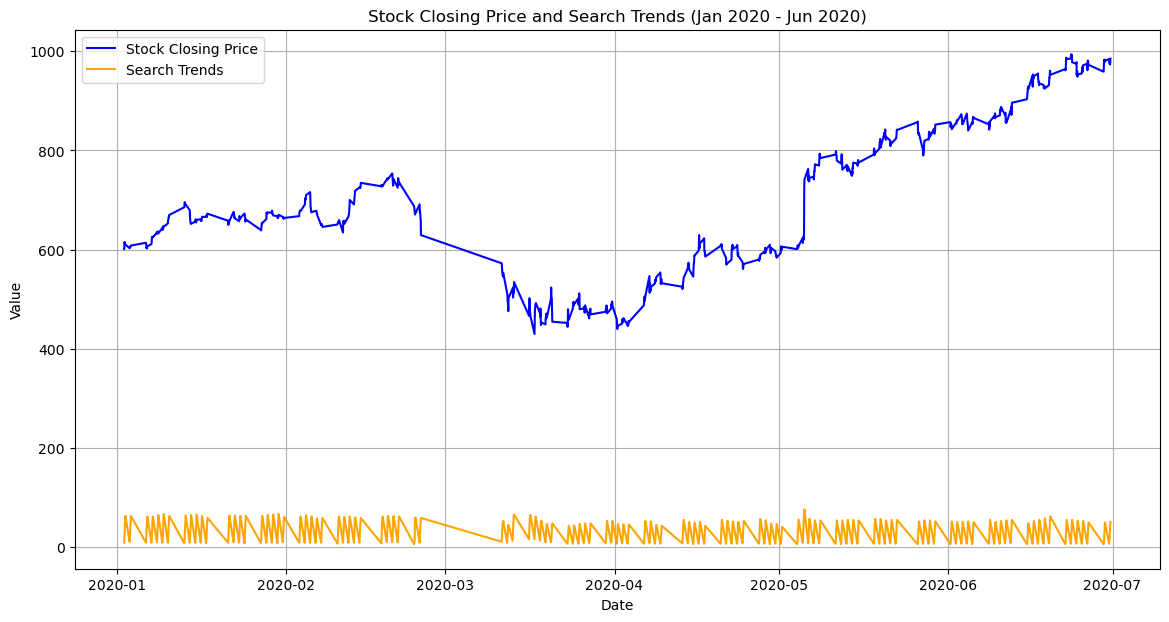

In [18]:

# Load the stock price data into a DataFrame
# Set the "date" column as the Datetime Index
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# Load the search trends data into a DataFrame
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Concatenate the stock price data to the search data in a single DataFrame
df_combined = pd.concat([df_mercado_stock['close'], df_mercado_trends['Search Trends']], axis=1).dropna()

# Slice the combined DataFrame to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = df_combined.loc['2020-01':'2020-06']

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())

# Plot the data for the first half of 2020
plt.figure(figsize=(14, 7))
plt.plot(first_half_2020.index, first_half_2020['close'], label='Stock Closing Price', color='blue')
plt.plot(first_half_2020.index, first_half_2020['Search Trends'], label='Search Trends', color='orange')
plt.title('Stock Closing Price and Search Trends (Jan 2020 - Jun 2020)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**  Yes, the beginning of 2020 was challenging and the stock and search shows it.  once we were in the thick of the pandemic, ecommerce companies like ML increased in both search volume and stock price.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock price data into a DataFrame
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# Load the search trends data into a DataFrame
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Concatenate the stock price data to the search data in a single DataFrame
df_combined = pd.concat([df_mercado_stock['close'], df_mercado_trends['Search Trends']], axis=1).dropna()

# Create a new column called Lagged Search Trends that shifts the search traffic by one hour
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)

# Create a new column called Stock Volatility that holds an exponentially weighted four-hour rolling average of the company’s stock volatility
df_combined['Stock Volatility'] = df_combined['close'].pct_change().rolling(window=4).std() * (4 ** 0.5)

# Create a new column called Hourly Stock Return that holds the percent change of the company's stock price on an hourly basis
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()

# View the first five rows of the updated DataFrame
display(df_combined.head())




/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/2196487361.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.012268,-0.002346


/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/2430539673.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


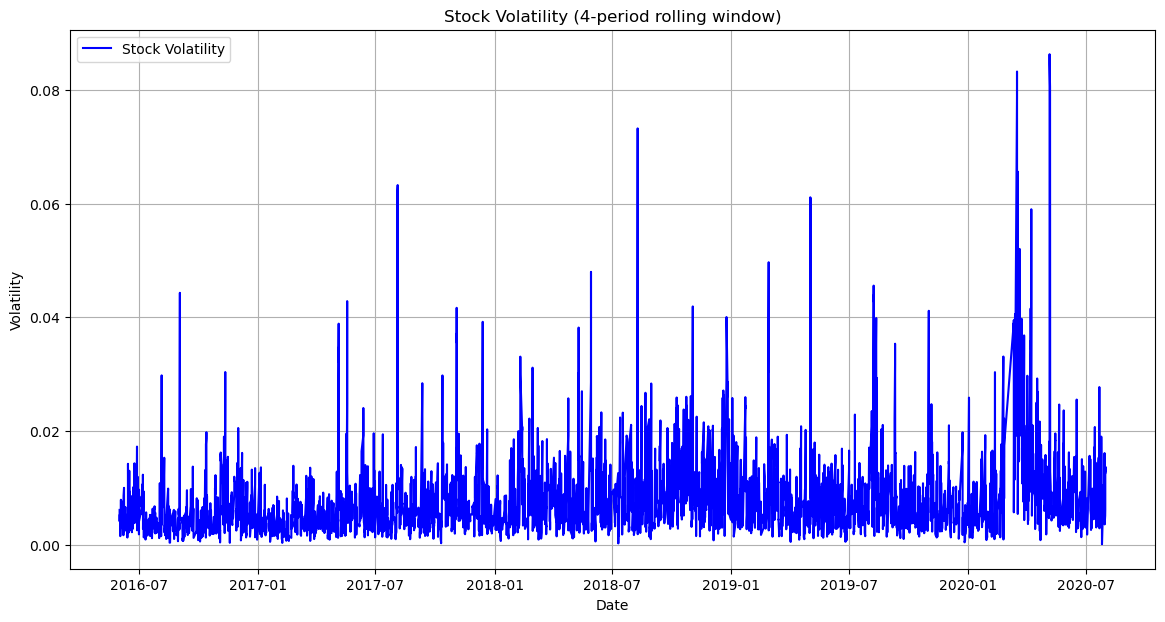

In [21]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock price data into a DataFrame
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# Load the search trends data into a DataFrame
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Concatenate the stock price data to the search data in a single DataFrame
df_combined = pd.concat([df_mercado_stock['close'], df_mercado_trends['Search Trends']], axis=1).dropna()

# Create a new column called Stock Volatility that holds the standard deviation of the closing stock price return data over a 4-period rolling window
df_combined['Stock Volatility'] = df_combined['close'].pct_change().rolling(window=4).std()

# Visualize the stock volatility
plt.figure(figsize=(14, 7))
plt.plot(df_combined.index, df_combined['Stock Volatility'], label='Stock Volatility', color='blue')
plt.title('Stock Volatility (4-period rolling window)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/2016324637.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566,0.010678


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

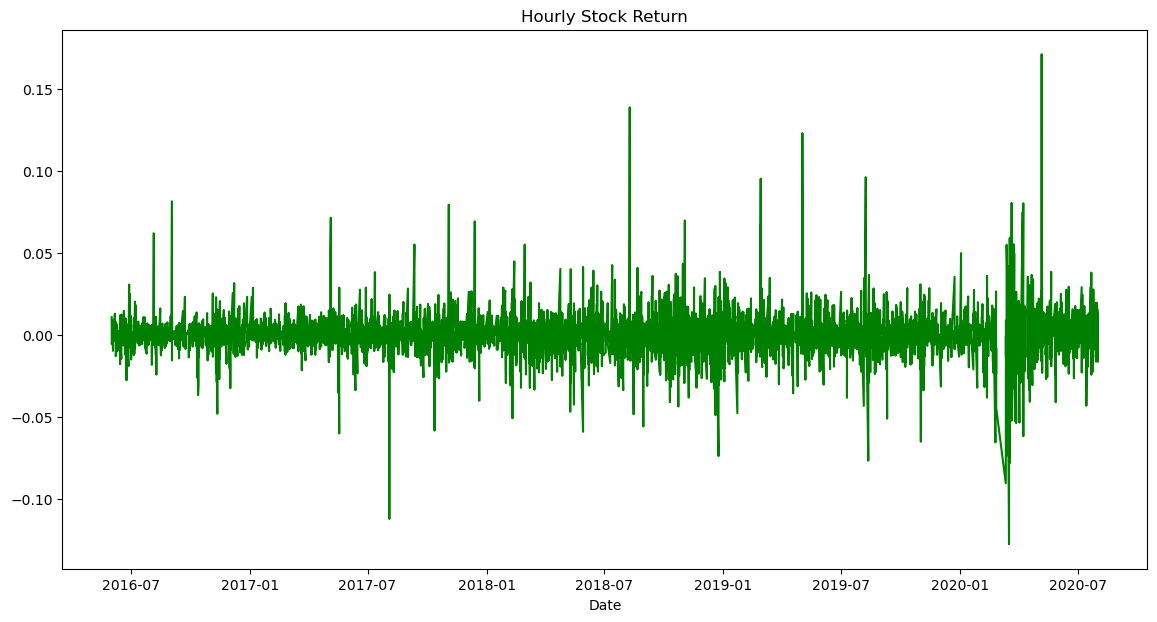

In [23]:


# Load the stock price data into a DataFrame
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# Load the search trends data into a DataFrame
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Concatenate the stock price data to the search data in a single DataFrame
df_combined = pd.concat([df_mercado_stock['close'], df_mercado_trends['Search Trends']], axis=1).dropna()

# Create a new column called Lagged Search Trends that shifts the search traffic by one hour
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)

# Create a new column called Stock Volatility that holds the standard deviation of the closing stock price return data over a 4-period rolling window
df_combined['Stock Volatility'] = df_combined['close'].pct_change().rolling(window=4).std()

# Create a new column called Hourly Stock Return that calculates hourly return percentage of the closing price
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()

# View the first and last five rows of the updated DataFrame
display(df_combined.head())
display(df_combined.tail())

# Optional: Plot Hourly Stock Return to visualize it
plt.figure(figsize=(14, 7))
plt.plot(df_combined.index, df_combined['Hourly Stock Return'], label='Hourly Stock Return', color='green')
plt.title('Hourly Stock Return')
plt.xlabel('Date')
plt.ylabel



#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [26]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock price data into a DataFrame
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# Load the search trends data into a DataFrame
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Concatenate the stock price data to the search data in a single DataFrame
df_combined = pd.concat([df_mercado_stock['close'], df_mercado_trends['Search Trends']], axis=1).dropna()

# Create a new column called Lagged Search Trends that shifts the search traffic by one hour
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)

# Create a new column called Stock Volatility that holds the standard deviation of the closing stock price return data over a 4-period rolling window
df_combined['Stock Volatility'] = df_combined['close'].pct_change().rolling(window=4).std()

# Create a new column called Hourly Stock Return that calculates hourly return percentage of the closing price
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()

# Drop NA values to ensure clean correlation computation
df_combined_clean = df_combined.dropna()

# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = df_combined_clean[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

# Display the correlation table
print(correlation_table)


/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/498741121.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


                      Stock Volatility  Lagged Search Trends  \
Stock Volatility              1.000000             -0.148938   
Lagged Search Trends         -0.148938              1.000000   
Hourly Stock Return           0.061424              0.018120   

                      Hourly Stock Return  
Stock Volatility                 0.061424  
Lagged Search Trends             0.018120  
Hourly Stock Return              1.000000  


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** There does not appear to be a strong or predictible relationship between the lagged search and volatility or between the lagged search and stock price.  Very likely other influences, such as earnings, have greater impact.  

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [27]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet

# Load the search trends data into a DataFrame
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Reset the index so the date information is no longer the index
df_mercado_trends_reset = df_mercado_trends.reset_index()

# Label the columns ds and y for Prophet
df_mercado_trends_reset.columns = ['ds', 'y']

# Drop any NaN values from the DataFrame
df_mercado_trends_reset = df_mercado_trends_reset.dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_trends_reset.head())
display(df_mercado_trends_reset.tail())

# Optional: Save the DataFrame for further use with Prophet
df_mercado_trends_reset.to_csv('mercado_prophet_df.csv', index=False)


/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/3524434683.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [28]:
# Call the Prophet function, store as an object
# Import necessary libraries
import pandas as pd
from prophet import Prophet

# Load the search trends data into a DataFrame
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Reset the index so the date information is no longer the index
df_mercado_trends_reset = df_mercado_trends.reset_index()

# Label the columns ds and y for Prophet
df_mercado_trends_reset.columns = ['ds', 'y']

# Drop any NaN values from the DataFrame
df_mercado_trends_reset = df_mercado_trends_reset.dropna()

# Call the Prophet function, store as an object
model = Prophet()

# View the Prophet object
print(model)


/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/1563674960.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


In [29]:
# Fit the time-series model.
# Import necessary libraries
import pandas as pd
from prophet import Prophet

# Load the search trends data into a DataFrame
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Reset the index so the date information is no longer the index
df_mercado_trends_reset = df_mercado_trends.reset_index()

# Label the columns ds and y for Prophet
df_mercado_trends_reset.columns = ['ds', 'y']

# Drop any NaN values from the DataFrame
df_mercado_trends_reset = df_mercado_trends_reset.dropna()

# Call the Prophet function, store as an object
model = Prophet()

# Fit the time-series model
model.fit(df_mercado_trends_reset)

# View the Prophet object after fitting the model
print(model)


/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/1817269318.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(
15:31:53 - cmdstanpy - INFO - Chain [1] start processing
15:32:00 - cmdstanpy - INFO - Chain [1] done processing


In [31]:


# Load the search trends data into a DataFrame
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Reset the index so the date information is no longer the index
df_mercado_trends_reset = df_mercado_trends.reset_index()

# Label the columns ds and y for Prophet
df_mercado_trends_reset.columns = ['ds', 'y']

# Drop any NaN values from the DataFrame
df_mercado_trends_reset = df_mercado_trends_reset.dropna()

# Call the Prophet function, store as an object
model = Prophet()

# Fit the time-series model
model.fit(df_mercado_trends_reset)

# Create a future dataframe to hold predictions, forecasting 2000 hours into the future
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_trends.tail())


/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/672280118.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(
15:33:49 - cmdstanpy - INFO - Chain [1] start processing
15:33:55 - cmdstanpy - INFO - Chain [1] done processing


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [32]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet

# Load the search trends data into a DataFrame
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Reset the index so the date information is no longer the index
df_mercado_trends_reset = df_mercado_trends.reset_index()

# Label the columns ds and y for Prophet
df_mercado_trends_reset.columns = ['ds', 'y']

# Drop any NaN values from the DataFrame
df_mercado_trends_reset = df_mercado_trends_reset.dropna()

# Call the Prophet function, store as an object
model = Prophet()

# Fit the time-series model
model.fit(df_mercado_trends_reset)

# Create a future dataframe to hold predictions, forecasting 2000 hours into the future
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head())


/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/4056465917.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(
18:44:15 - cmdstanpy - INFO - Chain [1] start processing
18:44:22 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.129250,80.971212,97.689923,44.129250,44.129250,45.429305,45.429305,45.429305,41.452726,...,1.860133,1.860133,1.860133,2.116445,2.116445,2.116445,0.0,0.0,0.0,89.558555
1,2016-06-01 01:00:00,44.130313,77.955290,94.584611,44.130313,44.130313,41.875073,41.875073,41.875073,37.943506,...,1.810049,1.810049,1.810049,2.121518,2.121518,2.121518,0.0,0.0,0.0,86.005386
2,2016-06-01 02:00:00,44.131375,67.077784,84.040624,44.131375,44.131375,31.551566,31.551566,31.551566,27.656533,...,1.768474,1.768474,1.768474,2.126559,2.126559,2.126559,0.0,0.0,0.0,75.682942
3,2016-06-01 03:00:00,44.132438,52.159584,69.608633,44.132438,44.132438,16.284352,16.284352,16.284352,12.417280,...,1.735502,1.735502,1.735502,2.131569,2.131569,2.131569,0.0,0.0,0.0,60.416789
4,2016-06-01 04:00:00,44.133500,35.145204,51.916854,44.133500,44.133500,-0.830504,-0.830504,-0.830504,-4.678139,...,1.711088,1.711088,1.711088,2.136547,2.136547,2.136547,0.0,0.0,0.0,43.302997


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/23488354.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(
19:02:02 - cmdstanpy - INFO - Chain [1] start processing
19:02:08 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndar

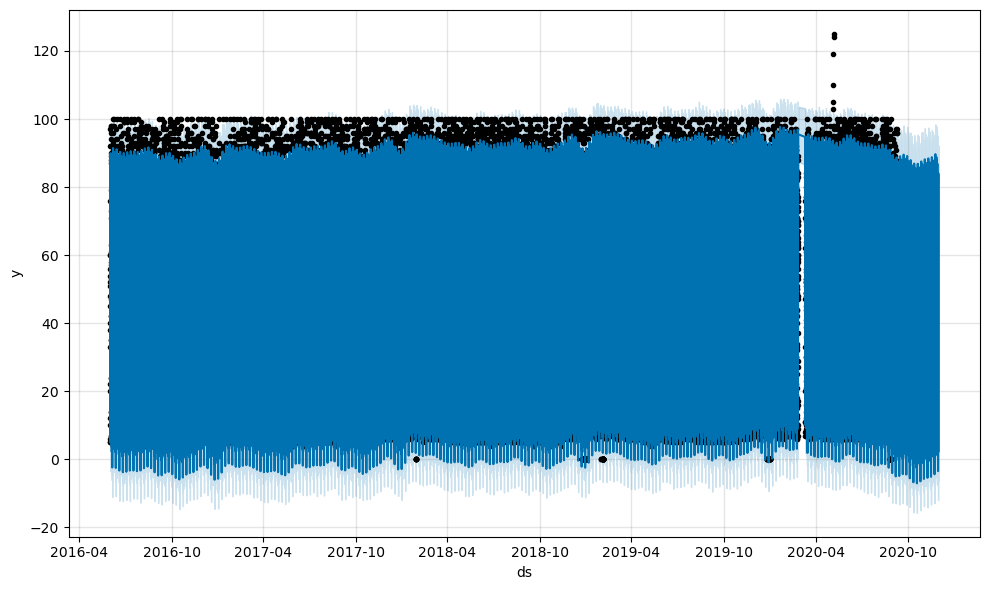

In [41]:

# Load the search trends data into a DataFrame
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Reset the index so the date information is no longer the index
df_mercado_trends_reset = df_mercado_trends.reset_index()

# Label the columns ds and y for Prophet
df_mercado_trends_reset.columns = ['ds', 'y']

# Drop any NaN values from the DataFrame
df_mercado_trends_reset = df_mercado_trends_reset.dropna()

# Call the Prophet function, store as an object
model = Prophet()

# Fit the time-series model
model.fit(df_mercado_trends_reset)

# Create a future dataframe to hold predictions, forecasting 2000 hours into the future
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)

# Plot the Prophet predictions for the Mercado trends data
fig = model.plot(forecast_mercado_trends)
plt.show()


##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**  It looks like it will be relatively stable without any material deviations..  the shock value there was covid.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [34]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)

# View only the yhat, yhat_lower, and yhat_upper columns from the DataFrame
forecast_selected_columns = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]

# Display the first few rows of the selected columns
display(forecast_selected_columns.head())


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.558555,81.087162,98.282494
2016-06-01 01:00:00,86.005386,77.581611,94.570821
2016-06-01 02:00:00,75.682942,67.329868,84.228817
2016-06-01 03:00:00,60.416789,52.371465,68.739442
2016-06-01 04:00:00,43.302997,34.908855,51.642930


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

/var/folders/pg/ts04ggc55jn15g_45xlq3jjm0000gn/T/ipykernel_24657/194142081.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(
19:01:30 - cmdstanpy - INFO - Chain [1] start processing
19:01:36 - cmdstanpy - INFO - Chain [1] done processing


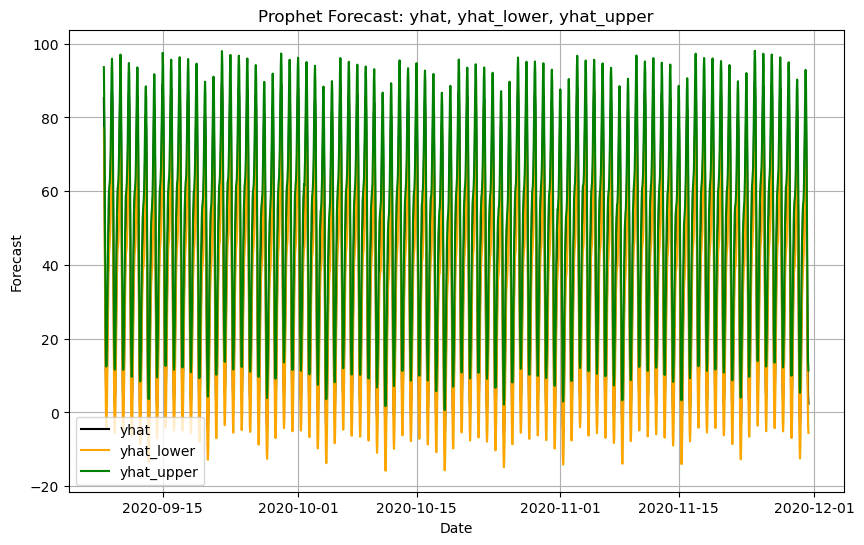

In [40]:


# Load the search trends data into a DataFrame
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Reset the index so the date information is no longer the index
df_mercado_trends_reset = df_mercado_trends.reset_index()

# Label the columns ds and y for Prophet
df_mercado_trends_reset.columns = ['ds', 'y']

# Drop any NaN values from the DataFrame
df_mercado_trends_reset = df_mercado_trends_reset.dropna()

# Call the Prophet function, store as an object
model = Prophet()

# Fit the time-series model
model.fit(df_mercado_trends_reset)

# Create a future dataframe to hold predictions, forecasting 2000 hours into the future
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)

# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)

# Plot the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
plt.figure(figsize=(10, 6))
plt.plot(forecast_mercado_trends.index[-2000:], forecast_mercado_trends['yhat'][-2000:], label='yhat', color='black')
plt.plot(forecast_mercado_trends.index[-2000:], forecast_mercado_trends['yhat_lower'][-2000:], label='yhat_lower', color='orange')
plt.plot(forecast_mercado_trends.index[-2000:], forecast_mercado_trends['yhat_upper'][-2000:], label='yhat_upper', color='green')
plt.fill_between(forecast_mercado_trends.index[-2000:], forecast_mercado_trends['yhat_lower'][-2000:], forecast_mercado_trends['yhat_upper'][-2000:], color='lightgreen', alpha=0.3)
plt.title('Prophet Forecast: yhat, yhat_lower, yhat_upper')
plt.xlabel('Date')
plt.ylabel('Forecast')
plt.legend()
plt.grid(True)
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior,

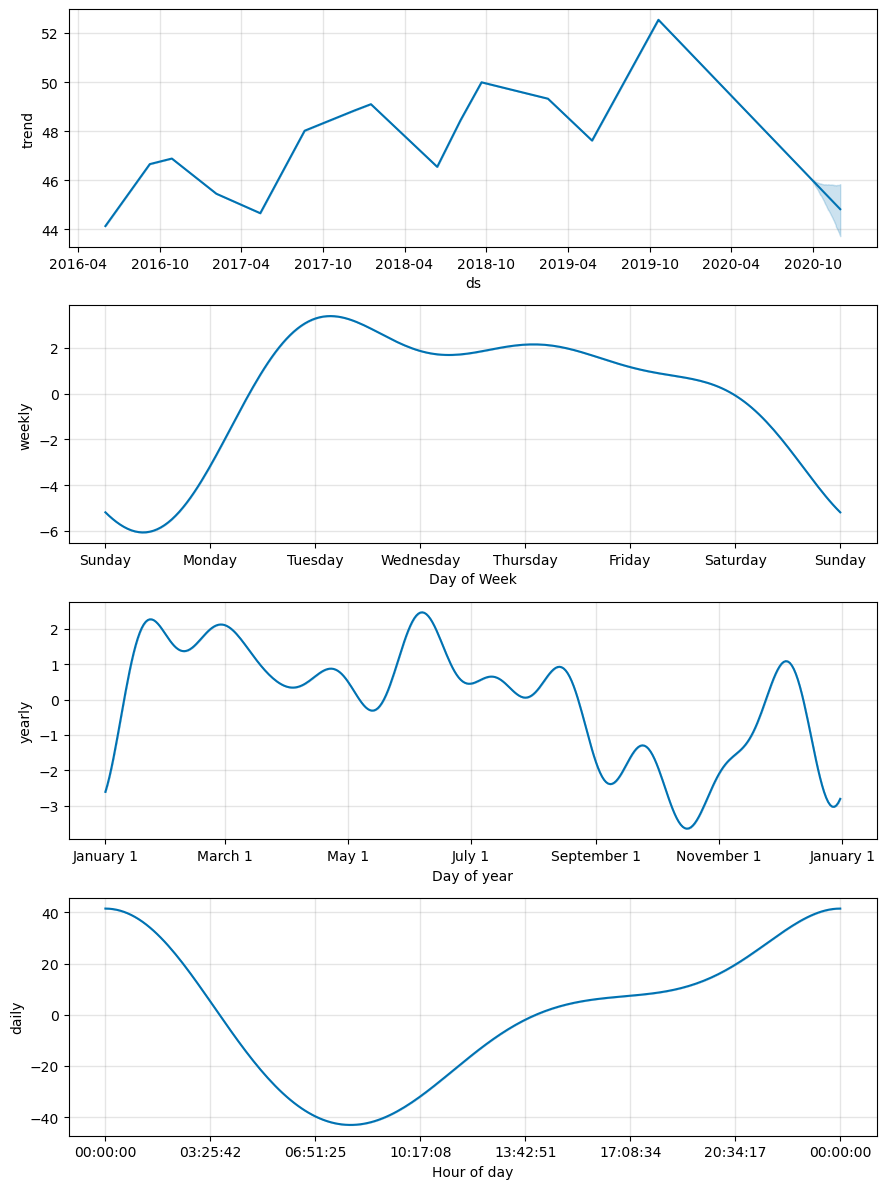

In [39]:


# Reset the index in the forecast_mercado_trends DataFrame to ensure 'ds' is a column
forecast_mercado_trends_reset = forecast_mercado_trends.reset_index()

# Ensure that 'ds' is the datetime column
if 'ds' not in forecast_mercado_trends_reset.columns:
    forecast_mercado_trends_reset.rename(columns={'index': 'ds'}, inplace=True)

# Use the plot_components function to visualize the forecast results
model.plot_components(forecast_mercado_trends_reset)
plt.show()



##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** It looks like late in the day

**Question:** Which day of week gets the most search traffic?
   
**Answer:**Tuesday

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**  Appears to be October-ish and also around Christmas and New Year
